# Atomic, Molecular, Ionic Hydrogen Distribution in Galaxy as Defined in GALPROP

**<u>Ionized Component of Hydrogen</u>** Defined in $\left(\text{atom}\, \text{cm}^{-3}\right)$. 

$n_{H_{II}} (R, Z) = \sum \limits_{i=1, 2} n_i \text{exp}\, \left[-\frac{\left|z\right|}{h_i} - \frac{\left(R-R_i\right)^2}{a_i^2}\right]$, <br>
where $n_i=0.025,\, n_2 = 0.200,\, h_1 = 1\text{kpc},\, h_2 = 0.15\text{kpc},\, R_1 = 0, \, R_2=4\text{kpc}, \, a_1 = 2\text{kpc}, \, a_2=20\text{kpc}$.  

In [2]:
import math 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [3]:
fne1, fne2 = 0.025, 0.200 
H1, H2 = 1.00, 0.15
A1, A2 = 20.0, 2.0
R2, R1 = 4.0, 0.

#Z #height 
def nhIIZdep1(Z=0.1):
    radius1 = []
    ion_hyd1 = []
    for x in range(0, 400, 2):
        Rkpc = x/20
        radius1.append(Rkpc)
        ne1 = fne1 * math.exp(-abs(Z)/H1) * math.exp (-pow((Rkpc-R1)/A1, 2))
        ne2 = fne2 * math.exp(-abs(Z)/H2) * math.exp (-pow((Rkpc-R2)/A2, 2))
        ion_hyd1.append(ne1 + ne2)
    plt.plot(radius1, ion_hyd1, color='red', linestyle='--', label='Z=0.1 kpc')
    
def nhIIZdep2(Z=0.2):
    radius2 = []
    ion_hyd2 = []
    for x in range(0, 400, 2):
        Rkpc = x/20
        radius2.append(Rkpc)
        ne1 = fne1 * math.exp(-abs(Z)/H1) * math.exp (-pow((Rkpc-R1)/A1, 2))
        ne2 = fne2 * math.exp(-abs(Z)/H2) * math.exp (-pow((Rkpc-R2)/A2, 2))
        ion_hyd2.append(ne1 + ne2)
    plt.plot(radius2, ion_hyd2, color='blue', linestyle='-.', label='Z=0.2 kpc')    

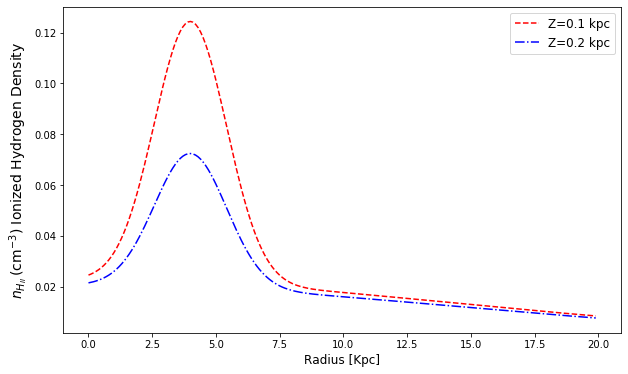

In [5]:
fig = plt.figure(figsize=(10, 6))

plt.xlabel('Radius [Kpc]', fontsize=12)
plt.ylabel(r'$n_{H_{II}}\, \left(\mathdefault{cm}^{-3}\right)$ Ionized Hydrogen Density', fontsize=14)

# plt.xscale('log')

nhIIZdep1(Z=0.1)
nhIIZdep2(Z=0.2)

plt.legend(fontsize=12)
plt.savefig("Ionized_Hydrogen_Density.png", dpi=200)
plt.show()

![HIIdensity](Ionized_Hydrogen_Density.png)

**<u>Atomic Hydrogen Distribution</u>** 

$n_{H_I} = \frac{1}{n_{GB}}\, Y(R) \sum \limits_{1, 2} A_i e^{-\text{ln}\, 2 (z^2/z_i^2)} + A_3 e^{-\left|z\right|/z_3}$, for $R\leq 8$ kpc. <br>
$Y(R)$ is the distributon from _Gordon and Burton (1976)_ and $n_{GB} = 0.33\, \text{cm}^{-3}$ is the disk density as described in in the paper for the range $4\leq R\leq 8$ kpc. <br>
Other values used are $A_1 = 0.395,\, A_2 = 0.107, \, A_3 = 0.064, z_1=0.106, z_2=0.265, z_3=0.403$. 

As defined in GALPROP in terms of Radius $(R)$ and $Y(R)$ from GB, <br>
R[30] = { 0.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,  # kpc, col.1 <br>
         6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5,10.0,10.5,11.0, <br>
         11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0}, <br>
         

Y[30] = { .10, .13, .14, .16, .19, .25, .30, .33, .32, .31,  // nHI, cm^-3 <br>
		 .30, .37, .38, .36, .32, .29, .38, .40, .25, .23,  // (col.3) <br>
         .32, .36, .32, .25, .16, .10, .09, .08, .06, .00}; <br>

In [14]:
# Define and R and Density in a list 
R = [0.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 
     7.0, 7.5, 8.0, 8.5, 9.0, 9.5,10.0,10.5,11.0, 
    11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0] # radius in kpc
Y = [.10, .13, .14, .16, .19, .25, .30, .33, .32, .31, 
    .30, .37, .38, .36, .32, .29, .38, .40, .25, .23, 
    .32, .36, .32, .25, .16, .10, .09, .08, .06, .00] # nhI, cm^-3
ngb = 0.33
A1, A2, A3 = 0.395, 0.107, 0.064
z1, z2, z3 = 0.106, 0.265, 0.403

def nhIZdep1(Z=0.1):
    nhI1 = []
    for i in range(len(R)):
        A1t = A1*math.exp(-math.log(2.)*pow(Z/z1,2))
        A2t = A2*math.exp(-math.log(2.)*pow(Z/z2,2))
        A3t = A3*math.exp(-abs(Z)/z3)
        yt = Y[i] * (A1t + A2t + A3t)
        ngbt = yt/(ngb)
        nhI1.append(ngbt)
    plt.plot(R, nhI1, linestyle='--', color='lime', label='Z = 0.1 kpc')
    

def nhIZdep2(Z=0.2):
    nhI2 = []
    for i in range(len(R)):
        A1t = A1*math.exp(-math.log(2.)*pow(Z/z1,2))
        A2t = A2*math.exp(-math.log(2.)*pow(Z/z2,2))
        A3t = A3*math.exp(-abs(Z)/z3)
        yt = Y[i] * (A1t + A2t + A3t)
        ngbt = yt/(ngb)
        nhI2.append(ngbt)
    plt.plot(R, nhI2, linestyle='-.', color='cyan', label='Z = 0.2 kpc')

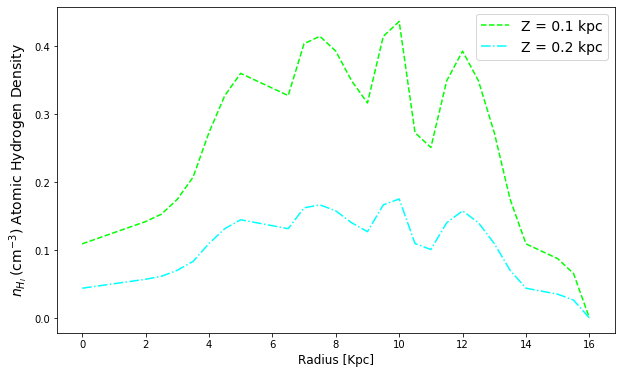

In [15]:
fig = plt.figure(figsize=(10, 6))

plt.xlabel('Radius [Kpc]', fontsize=12)
plt.ylabel(r'$n_{H_{I}}\, \left(\mathdefault{cm}^{-3}\right)$ Atomic Hydrogen Density', fontsize=14)

nhIZdep1(Z=0.1)
nhIZdep2(Z=0.2)
plt.legend(fontsize=14)
# plt.savefig("Atomic_Hydrogen_Density.png", dpi=200)
plt.show()

![Atomic Hydrogen Density](Atomic_Hydrogen_Density.png)

**<u>Molecular Hydrogen Distribution</u>** 

$H_2$ number density is given in mol $\text{cm}^{-3}$. <br>

$n_{H_2} (R, z) = 3.24 \times 10 ^{-22}\, X \epsilon _0 (R)\, e^{-\text{ln}\, 2 (z-z_0)^2/z_h ^2} $, <br>

where $\epsilon _0 (R)\, \left(\text{K Km}\, \text{s}^{-1}\, \text{kpc}^{-1}\right) $ is the CO volume emissivity, $z_0(R)$ and $z_h(R)$ are the height scale and width defined by <br> 
table _Bronfman et.al. (1988)_, and $X\equiv n_{H_2}/\epsilon _{CO} = 1.9\times 10^{20}\, \text{mol}\, \text{cm}^{-2}/(\text{K}\, \text{km}\, \text{s}^{-1})$ is the conversion factor _(Strong & Mattox 1996)_.  <br>



In [8]:
R  =[0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,1.10,1.20,1.30,1.40,1.50,
        2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.75,6.25,6.75,7.25,7.75,8.25,8.75,9.25,9.75,
        10,11,12,13,14,15,16,17,18,19,20,21]


Y  =[43.7, 24.5, 10.7,1.6,1.4,1.5,1.1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,1.5,3.3,5.8,
    5.5,8.4,9.0,9.6,8.6,9.1,7.9,9.2,7.7,5.0,3.6,4.8,1.7,0.4,1.2,1.0,0.7,0.3,0.15,0.09,
    0.07,0.05,0.005,0.008,0.004]

Z0 =[0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.039,0.036,0.000,
     -.008,0.001,-.010,-.001,-.004,-.019,-.022,-.014,-.009,
     -.004,0.013,-.004,-.020,0,0,0,0,0,0,0,0,0,0,0,0]


Zh =[0.070,0.070,0.070,0.070,0.070,0.070,0.070,0.070,0.070,
     0.070,0.070,0.070,0.070,0.070,0.070,0.070, 0.077,0.080,
     0.061,0.065,0.071,0.072,0.082,0.083,0.073,0.063,0.058,0.072,
     0.080,0.066,0.023,0.147,0.111,0.136,0.147,0.160,0.223,
     0.257,0.220,0.200,0.188,0.200,0.200,0.200]


# print (len(R), len(Z0), len(Zh))
H2toCO = 1.9e20
kpc2cm = 3.08568e21
Rkpc = 8.4

def nh2Zdep1(Zkpc=0.0):
    nh2 = []
    rad = []
    for i in range(len(R)-1):
#         print (R[i])
        fR = Y[i] + ( Y[i+1] - Y[i])/(R[i+1] - R[i])*(Rkpc - R[i])
        fZ0= Z0[i] + (Z0[i+1] -Z0[i])/(R[i+1] - R[i])*(Rkpc - R[i])
        fZh= Zh[i] + (Zh[i+1] -Zh[i])/(R[i+1] - R[i])*(Rkpc - R[i])
        dens =  fR * math.exp( -math.log(2.)*pow( (Zkpc-fZ0)/fZh, 2 ) )  *H2toCO/kpc2cm
        if dens >= 0:
            nh2.append(dens)
            rad.append(R[i])
#     print (nh2)
    plt.plot(rad, nh2, linestyle='-', color='blue', label='Z = 0.1 kpc')    
    
def nh2Zdep2(Zkpc=0.1):
    nh2 = []
    rad = []
    for i in range(len(R)-1):
        fR = Y[i] + ( Y[i+1] - Y[i])/(R[i+1] - R[i])*(Rkpc - R[i])
        fZ0= Z0[i] + (Z0[i+1] -Z0[i])/(R[i+1] - R[i])*(Rkpc - R[i])
        fZh= Zh[i] + (Zh[i+1] -Zh[i])/(R[i+1] - R[i])*(Rkpc - R[i])
        dens =  fR * math.exp( -math.log(2.)*pow( (Zkpc-fZ0)/fZh, 2 ) )  *H2toCO/kpc2cm
        if dens >= 0:
            nh2.append(dens)    
            rad.append(R[i])
    plt.plot(rad, nh2, linestyle='--', color='red', label='Z = 0.2 kpc')

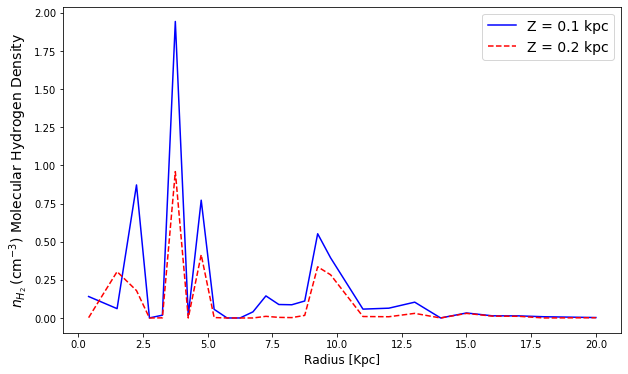

In [9]:
fig = plt.figure(figsize=(10, 6))

plt.xlabel('Radius [Kpc]', fontsize=12)
plt.ylabel(r'$n_{H_{2}}\, \left(\mathdefault{cm}^{-3}\right)$ Molecular Hydrogen Density', fontsize=14)



nh2Zdep1(Zkpc=0.1)
nh2Zdep2(Zkpc=0.2)

plt.legend(fontsize=14)
plt.savefig("Molecular_Hydrogen_Density.png", dpi=300)
plt.show()

![Molecular Hydrogen density](Molecular_Hydrogen_Density.png)

**<u>Dependence on Ionic Hydrogen</u>**


![H1 Deoendence](Ionized_Hydrogen_Dependence.png)

**<u>Dependence on Molecular Hydrogen</u>**


![H2 Dependence](Molecular_Hydrogen_check.png)

**<u>Dependence on Atomic Hydrogen</u>**

![atomic_Hyd](Atomic_Hydrogen_Dependence.png)